# Project 9

In the coding project below, answer any bolded questions on Canvas via the assigment named Programming Project 9 Quiz Questions.

Please follow the instructions below (e.g., setting random state values) to ensure that your answers match the solutions.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

You currently work for a company that offers a subscription-based music streaming service. After an unsuccessful round of marketing efforts with low return on investments, your company is exploring other strategies to promote its services. Currently, its advertising strategy has been to bid on a set of keywords that someone on the marketing team put together, but the team has realized that they could improve on this strategy by refining the keywords based on different customer personas. Therefore, the company has asked you to help it identify a set of user segments so that the ads can be more customized. 

For this task, you have been provided with the Music data which contains sociodemographic and music preference data on 4,914 users and your goal is to identify clusters of users based on this information.

| Column | Description |
|:-|:-|
| Age | Age of the user |
| Gender | Gender of the user |
| Employment status | Employment status of the user |
| Annual income | Annual income of the user in USD |
| Usage per month | Average usage per month of the user measured in minutes |
| Top genre | The genre of music that is most streamed by the user |
| Num of days active | The number of days in the last 365 days that the user used the service |



## Getting Set Up
Meet our old friend - PennGrader! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [1]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 56803282                  # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Jacky Choi"     # YOUR FULL NAME GOES HERE

In [2]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW9', student_id = STUDENT_ID)

In [3]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part A: Data Cleaning

Throughout this course, you have mostly been provided with relatively clean datasets but in the real world, data is usually a lot messier. This could be caused by data logging errors, bugs in the pipeline or even erroneous human input in surveys. Some common approaches of dealing with these observations are by dropping them, replacing the erroneous values with the mean/median, winsorizing, etc. Here, we will just drop them. 

1. Load the Music data and drop any rows with `NaN/null` values. Assign the dataframe to the variable `music`.

In [4]:
music = pd.read_csv("music.csv")
music = music.dropna()

In [5]:
grader.grade(test_case_id = 'test_read_music', answer = music.shape)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Plot bar charts and histograms of the data to visualize the distributions. Does anything seem unusual? Good to think about: can you encapsulate plotting data into a function?

    - Are there more male or female users? Store your answer in `male_or_female` ('M'/'F').
    - Which genre is the most popular among users? Store your answer in `pop_genre`.
    - How many users are students? Store you answer in `student_num`.

music

In [6]:
music

,age,gender,employment_status,annual_income,usage_per_month,top_genre,num_of_days_active
0,20,Male,Employed full-time,115000,847,Rock,210
1,22,Male,Employed full-time,42100,256,Rock,222
2,18,Male,Employed full-time,114750,1232,Country,161
3,19,Female,Employed full-time,118250,2310,Rock,176
4,33,Male,Employed full-time,111450,568,Pop,185
...,...,...,...,...,...,...,...
4909,31,Female,Unemployed,17150,1291,Rock,220
4910,41,Male,Employed full-time,19150,905,Pop,166
4911,37,Male,Employed full-time,39000,535,Rock,203
4912,43,Female,Student,138800,13,Rock,126


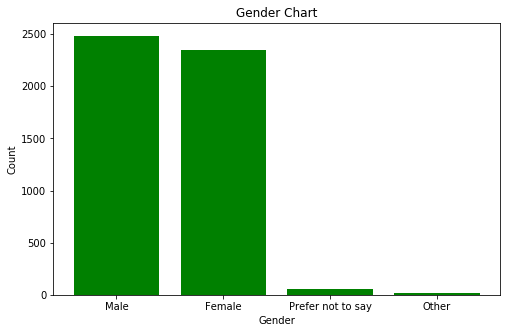

Male                 2482
Female               2350
Prefer not to say      60
Other                  22
Name: gender, dtype: int64


In [7]:
# Enter your code here
gender_counts = music['gender'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(gender_counts.index, gender_counts.values, color="green")
plt.title("Gender Chart")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
print(gender_counts)

In [8]:
male_or_female = 'M'

In [9]:
grader.grade(test_case_id = 'test_visual1', answer = male_or_female)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


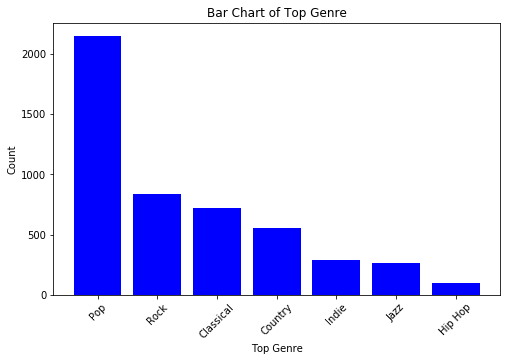

Pop          2149
Rock          835
Classical     721
Country       556
Indie         289
Jazz          265
Hip Hop        99
Name: top_genre, dtype: int64


In [10]:
genre_counts = music['top_genre'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(genre_counts.index, genre_counts.values, color="blue")
plt.title("Bar Chart of Top Genre")
plt.xlabel("Top Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
print(genre_counts)

In [11]:
pop_genre = 'Pop'

In [12]:
grader.grade(test_case_id = 'test_visual2', answer = pop_genre)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [13]:
employment_counts = music['employment_status'].value_counts()
print(employment_counts)

Employed full-time    3037
Student               1000
Employed part-time     513
Unemployed             364
Name: employment_status, dtype: int64


In [14]:
student_num = 1000

In [15]:
grader.grade(test_case_id = 'test_visual3', answer = student_num)

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


3. Take a closer look at ‘age’ and ‘num of days active’. Does anything look peculiar? Store the number of invalid 'age' in `bad_age_num`, invalid number of 'num of days active' in `bad_active_num`. Drop these rows and also assign the new dataframe to the variable `music`. *Hint*: Recall the values that age and number of days active can take on.

In [16]:
music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4914 entries, 0 to 4913
Data columns (total 7 columns):
age                   4914 non-null int64
gender                4914 non-null object
employment_status     4914 non-null object
annual_income         4914 non-null int64
usage_per_month       4914 non-null int64
top_genre             4914 non-null object
num_of_days_active    4914 non-null int64
dtypes: int64(4), object(3)
memory usage: 307.1+ KB


In [17]:
# Enter your code here
bad_age_num = ((music['age'] < 0) | (music['age'] > 100)).sum()
print(bad_age_num)

5


In [18]:
grader.grade(test_case_id = 'test_drop1', answer = bad_age_num)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [19]:
# Enter your code here
bad_active_num = ((music['num_of_days_active'] < 0) | (music['num_of_days_active'] > 365)).sum()
print(bad_active_num)


2


In [20]:
grader.grade(test_case_id = 'test_drop2', answer = bad_active_num)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [21]:
# Drop rows with invalid entries in-place
music = music[
    (music['age'] >= 0) & 
    (music['age'] <= 100) & 
    (music['num_of_days_active'] >= 0) & 
    (music['num_of_days_active'] <= 365)
]


In [22]:
grader.grade(test_case_id = 'test_drop3', answer = music.shape)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part B: Clustering

Use K-means clustering to find a set of user groups using the following features as inputs: ‘age’, ‘annual income’, ‘usage per month’ and ‘number of days active’.

1. Standardize the data. *Hint*: `sklearn.preprocessing.scale` may be helpful. 

In [23]:
from sklearn.preprocessing import StandardScaler
X = music[['age', 'annual_income', 'usage_per_month', 'num_of_days_active']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
grader.grade(test_case_id = 'test_scale', answer = X_scaled)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


2. Calculate the sum of squared distances of observations to their closest cluster center for $K\in [1,10]$ and add these values to a list called `ssd`. Use the default hyperparameters and set `random_state=42`. Store the minimum value of ssd in `min_ssd`. Comment on your thoughts: shall we choose the model with minimum ssd?

*Hint*: You may want to write a for-loop and refer to the [`sklearn.cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) documentation (read through the Attributes section).

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
# Enter your code here
ssd = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(X_scaled)  
    ssd.append(kmeans.inertia_)

min_ssd = 6009


In [ ]:
grader.grade(test_case_id = 'test_min_ssd', answer = min_ssd)

3. Plot the values in `ssd` against the number of clusters, $K$ for $K\in[1,10]$. 

In [ ]:
# Plot your ssd here
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o', linestyle='-', color='blue')
plt.title("Sum of Squared Distances (SSD) vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.xticks(range(1, 11))
plt.show()

4. Based on this plot, what is the best number of clusters to set using the Elbow Method? The Elbow Method is the point where diminishing returns are no longer worth the additional cost. It will be the point before which the later points taper off or increase by very little. (More information on the Elbow Method can be found [here](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In\%20cluster\%20analysis\%2C\%20the\%20elbow,number\%20of\%20clusters\%20to\%20use). Assign this value to the variable `optimal_K` (There might be multiple optimal k values, just enter one of those).

In [ ]:
optimal_K = 4

In [ ]:
grader.grade(test_case_id = 'test_best_K', answer = optimal_K)

6. Retrain the K-means clustering algorithm with `n_clusters=optimal_K`. This will be your final model. Name your model `best_kmeans` and set `random_state=42`.

In [ ]:
best_kmeans = KMeans(n_clusters=4, random_state=42)
best_kmeans.fit(X_scaled)


In [ ]:
print(best_kmeans)

In [ ]:
grader.grade(test_case_id = 'test_best_model', answer = (optimal_K, best_kmeans.cluster_centers_))

## Part C: Visualizing

As a data scientist, it is important to be able to translate your findings to colleagues who may not have the same level of technical knowledge as you do; visualizations help a lot! Therefore, you have decided to plot the clusters. However, since there are four dimensions that you want to plot – age, annual income, usage per month and number of days active – you will need to utilize dimensionality reduction techniques to be able to plot this on a 2-D plane.

1. Train another K-means model using the following features as inputs: `age`, `annual income`,
`usage per month` and `number of days active`. Fit your model on `X_scaled`, name your predicted result as `pred`. Use `n_clusters=2` and `random_state=42`. 

In [ ]:
# Enter your code here

kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(X_scaled) 
pred = kmeans_2.predict(X_scaled) 
pred


In [ ]:
grader.grade(test_case_id = 'test_kmeans_plot', answer = pred)

2. Find the first <b>two</b> principal components of the scaled data and save the new data to variable `X_reduced`. Name your model `pca`.

*Hint*: Use `sklearn.decomposition.PCA` with `random_state=42`.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2, random_state = 42)

X_reduced = pca.fit_transform(X_scaled)


In [ ]:
grader.grade(test_case_id = 'test_pca', answer = (pca.n_features_, pca.n_components_))

3. Plot a scatterplot with the $1^{st}$ principal component on the $x$-axis and the $2^{nd}$ principal component on the $y$-axis. Color each point by the cluster that it is in from (1). Comment on yout observations.

*Hint*: Check out `seaborn.FacetGrid`. To use it, you will need your principle components and predicted clusters in one dataframe.

In [ ]:
# Enter your code here
import seaborn as sns
pca_df = pd.DataFrame(X_reduced, columns=['PCA1', 'PCA2'])  # DataFrame with the 1st and 2nd principal components
pca_df['Cluster'] = pred
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title("PCA of Scaled Data with K-means Clusters")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.legend(title='Cluster')
plt.show()